# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 1 балл. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [ ]:
# Paste your code here.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Лаба питон"

'Копия coins.csv'  'Копия LabWork.ipynb'


In [ ]:
coins = pd.read_csv("/content/drive/My Drive/Лаба питон/Копия coins.csv") #если запускать то здесь путь надо поменять путь до coins.csv
coins.head()

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09


In [ ]:
new_coins_index = coins["date"]
new_coins_index.name = "datetime"
new_coins_index

0        2013-04-28
1        2013-04-28
2        2013-04-29
3        2013-04-29
4        2013-04-30
            ...    
37583    2018-06-06
37584    2018-06-06
37585    2018-06-06
37586    2018-06-06
37587    2018-06-06
Name: datetime, Length: 37588, dtype: object

In [ ]:
coins.index = new_coins_index
coins.head()

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
2013-04-30,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09


Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
len(set(coins["name"]))

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
print(coins['date'].min(), coins['date'].max())

2013-04-28 2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [ ]:
coins.isnull().max()

date               False
price               True
txCount             True
txVolume            True
activeAddresses     True
symbol             False
name               False
open               False
high               False
low                False
close              False
volume             False
market             False
dtype: bool

In [ ]:
coins[coins["price"].isnull() == True]  #да есть пропуски, нибира украла

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2017-07-13,2017-07-13,NaN,1.0,NaN,2.0,BTM,Bitmark,0.466206,0.506411,0.441576,0.452832,130598.0,1.818750e+06
2017-07-14,2017-07-14,NaN,1.0,NaN,2.0,BTM,Bitmark,0.452501,0.469475,0.407240,0.437192,24451.0,1.765290e+06
2017-07-15,2017-07-15,NaN,NaN,NaN,NaN,BTM,Bitmark,0.443719,0.443719,0.380308,0.380308,13078.0,1.731030e+06
2017-07-16,2017-07-16,NaN,NaN,NaN,NaN,BTM,Bitmark,0.379165,0.390941,0.314035,0.337244,22694.0,1.479190e+06
2017-07-17,2017-07-17,NaN,NaN,NaN,NaN,BTM,Bitmark,0.336871,0.479762,0.329417,0.417068,65672.0,1.314200e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,2018-06-02,NaN,586.0,NaN,513.0,VEN,VeChain,3.440000,3.790000,3.410000,3.710000,71906000.0,1.811970e+09
2018-06-03,2018-06-03,NaN,800.0,NaN,656.0,VEN,VeChain,3.700000,4.090000,3.620000,4.090000,93253300.0,1.944660e+09
2018-06-04,2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.060000,4.170000,3.830000,3.890000,92839700.0,2.135810e+09


In [ ]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
max_high = coins["high"].max()  
data_of_max_high = coins[coins["high"] == max_high]
print("name: " , data_of_max_high["name"][0] , ", time: ",  data_of_max_high["date"][0], sep='')
print("price: ", data_of_max_high["price"][0], ", high: ", max_high, sep='')

name: Bitcoin, time: 2017-12-17
price: 19475.8, high: 20089.0


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

max market: 326141000000.0 Bitcoin
min market: 0.0 Ethereum


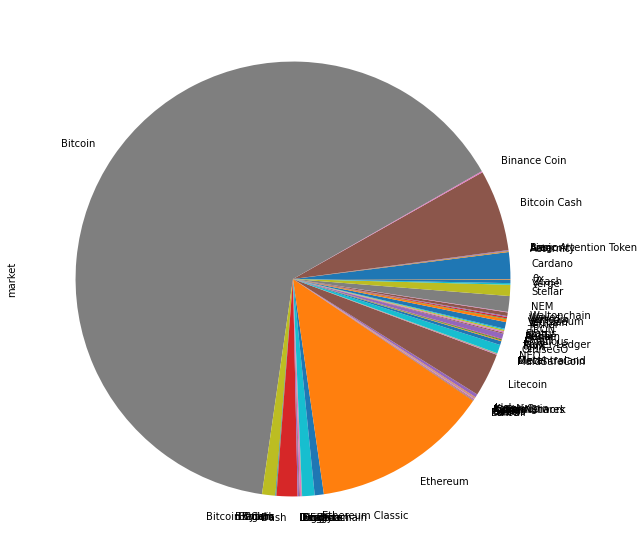

In [ ]:
date_of_max_high = data_of_max_high["date"][0]
C = coins[coins["date"] == date_of_max_high] 

coins_of_max_high = C["market"]
coins_of_max_high.index=C["name"]
coins_of_max_high.plot.pie(subplots=True, figsize=(15,10))

max_market = C["market"].max()
min_market = C["market"].min()
print("max market:", max_market, coins[coins["market"] == max_market]["name"][0])
print("min market:", min_market, coins[coins["market"] == min_market]["name"][0])

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [404]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) 
                                             & (coins['date'] <= end_date)]
    fig = plt.figure(
        figsize=(16, 9),  # размером 16 на 9 дюймов
        facecolor='whitesmoke',  # c подложкой цвета белый дым
        dpi=200  # разрешением 200 точек
    )
    y = (coin['low'] + coin['high']) / 2
    y_err = (coin['high'] - coin['low']) / 2
    x = pd.to_datetime(coin['date'])
    
    y_red       = []
    y_red_err   = []
    x_red       = []
    y_green     = []
    y_green_err = []
    x_green     = []
    
    for i in range(len(x)):
        if coin['open'][i] > coin['close'][i]:
            y_red.append((coin['open'][i] + coin['close'][i]) / 2)
            y_red_err.append((coin['open'][i] - coin['close'][i]) / 2)
            x_red.append(x[i])
        else:
            y_green.append((coin['open'][i] + coin['close'][i]) / 2)
            y_green_err.append((coin['close'][i] - coin['open'][i]) / 2)
            x_green.append(x[i])

    plt.errorbar(
        x, y, y_err, ecolor='blue', linewidth=0, elinewidth = 1
    )
    plt.errorbar(
        x_red, y_red, y_red_err, ecolor='red', linewidth=0, elinewidth = 2
    )
    plt.errorbar(
        x_green, y_green, y_green_err, ecolor='green', linewidth=0, elinewidth = 2
    )
    
    plt.title("График стоимости {} от времени на промежутке от {} до {}".format(symbol, start_date, end_date))

    plt.xlabel('Цена')
    plt.ylabel('Дата')
    
    plt.grid(True)
    
    plt.show()
    


Посмотрим, что получилось:

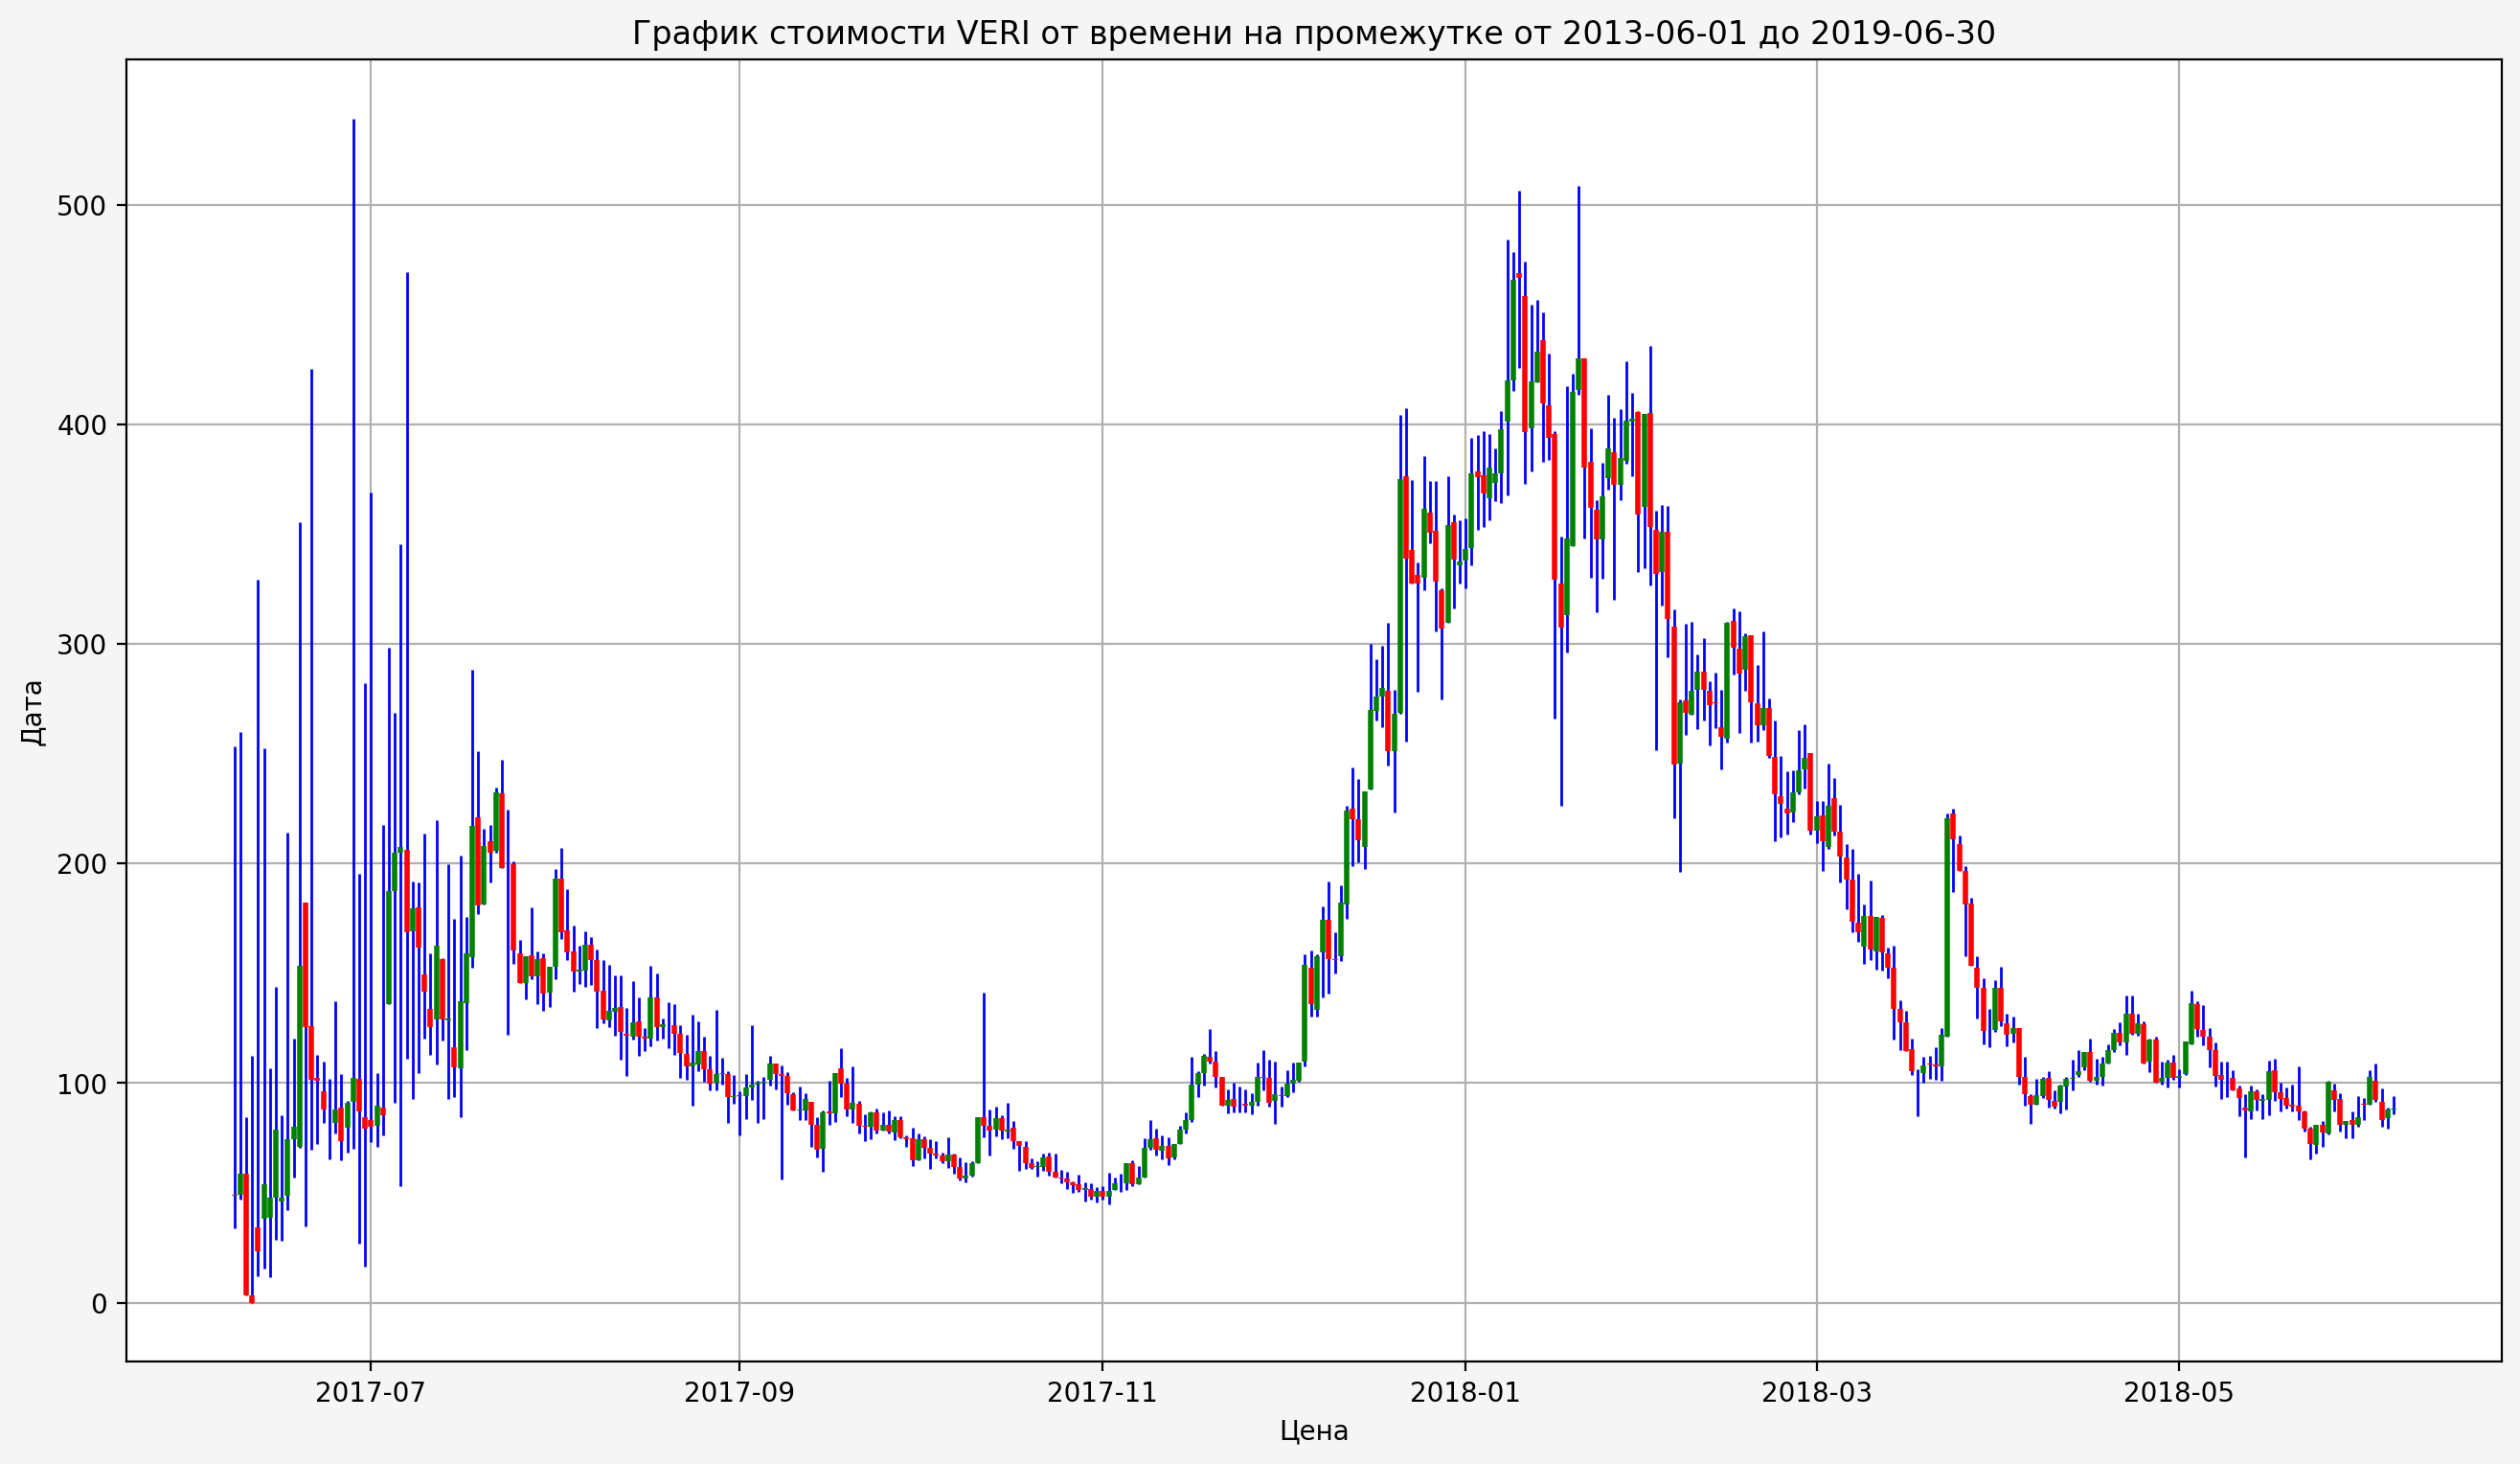

In [405]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data_copy = coins[(coins["date"] >= start_date) & (coins["date"] <= end_date) & (coins["symbol"] == symbol)]
    if data_copy.empty:
        return "There is no one " + symbol
    pnd = 0
    time_max_pnd = 0
    for i in data_copy["date"]:
        st = data_copy[data_copy["date"] == i]
        loc_pnd = st["high"][0] / max(st["open"][0], st["close"][0])
        if (pnd < loc_pnd):
            time_max_pnd = i
            pnd = loc_pnd
    return [time_max_pnd, pnd]

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

['2017-11-29', 1.1428940004366206]

#### Сравните эти значения для разных монет.

In [ ]:
start_date='2017-06-01'
end_date='2018-06-01'
ans = []
for i in set(coins[(coins["date"] >= start_date) & (coins["date"] <= end_date)]["symbol"]):
    x = find_most_severe_pump_and_dump(coins, i, start_date, end_date)
    x.append(i)
    ans.append(x)
data_max_pwn = [0,0,0]
for i in ans:
    if data_max_pwn[1] < i[1]:
        data_max_pwn = i
print("максимальный pwn:", data_max_pwn)
for i in ans:
    print(i)

максимальный pwn: ['2017-06-11', 33.549253731343285, 'VERI']
['2017-10-25', 1.3243755975664018, 'KCS']
['2017-12-26', 1.176079734219269, 'BNB']
['2017-11-29', 1.1428940004366206, 'BTC']
['2017-06-29', 12.490562327959102, 'FUN']
['2017-12-25', 1.7261674507210387, 'CVC']
['2018-01-04', 1.1358695652173911, 'XEM']
['2017-10-22', 1.3952095808383234, 'VTC']
['2017-11-29', 1.2031621370259378, 'DASH']
['2017-07-03', 1.3202933985330074, 'EOS']
['2017-11-28', 1.3587962962962963, 'PIVX']
['2017-12-30', 1.8916487255607852, 'SRN']
['2017-10-13', 1.7336683417085428, 'ANT']
['2017-11-12', 1.099009900990099, 'USDT']
['2017-09-29', 1.227206946454414, 'SALT']
['2017-06-04', 1.2342492522991364, 'BAT']
['2018-01-05', 1.2808988764044942, 'ELF']
['2017-11-29', 1.3861630321910696, 'SNT']
['2018-04-07', 1.177753188596324, 'CENNZ']
['2018-04-13', 1.6882121234525307, 'GNT']
['2018-01-13', 1.4986168741355463, 'WTC']
['2017-09-19', 1.8519240136385777, 'KNC']
['2017-09-11', 3.720797720797721, 'PPT']
['2017-10-08',

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [ ]:
#если нет криптавалюты, в конце, то считается что она стоит 0
#еслт нет криптовалюты  в начале то кидается ошибка
def compute_roi(coins, investments, start_date, end_date):
    start_cash, end_cash = 0., 0.
    
    for i in investments.keys():
        start = (coins['symbol'] == i) & (coins['date'] == start_date)
        end   = (coins['symbol'] == i) & (coins['date'] == end_date)
        
        if (start.max() == 0):
            raise Exception("You can't buy this")
        
        start_cash += investments[i]
        end_cash   += float (coins[end]['price'][0]  ) * investments[i] / coins[start]['price'][0]
    print((end_cash - start_cash) / start_cash)

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614


In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592


## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = coins[coins["symbol"] == symbol]

    mean  = data["price"].rolling(window=window).mean()
    std   = data["price"].rolling(window=window).std()

    fig = plt.figure(
        figsize=(16, 9),  # размером 16 на 9 дюймов
        facecolor='whitesmoke',  # c подложкой цвета белый дым
        dpi=200  # разрешением 200 точек
    )

    plt.title('График цены, скользящее среднее и границы Боллинджера c параметрами N (window) = 21, K (width) = 2 для '+ symbol)

    plt.plot(pd.to_datetime(data['date']), data["price"], color='black' , label='Цена')
    plt.plot(pd.to_datetime(data['date']), mean         , color='blue'  , label='MA')
    plt.plot(pd.to_datetime(data['date']), mean + std   , color='red'   , label='MA + K$\sigma$')
    plt.plot(pd.to_datetime(data['date']), mean - std   , color='green' , label='MA - K$\sigma$')

    plt.legend(loc='best')
    
    plt.xlabel('Цена')
    plt.ylabel('Дата')
    
    plt.grid(True)

    plt.show()

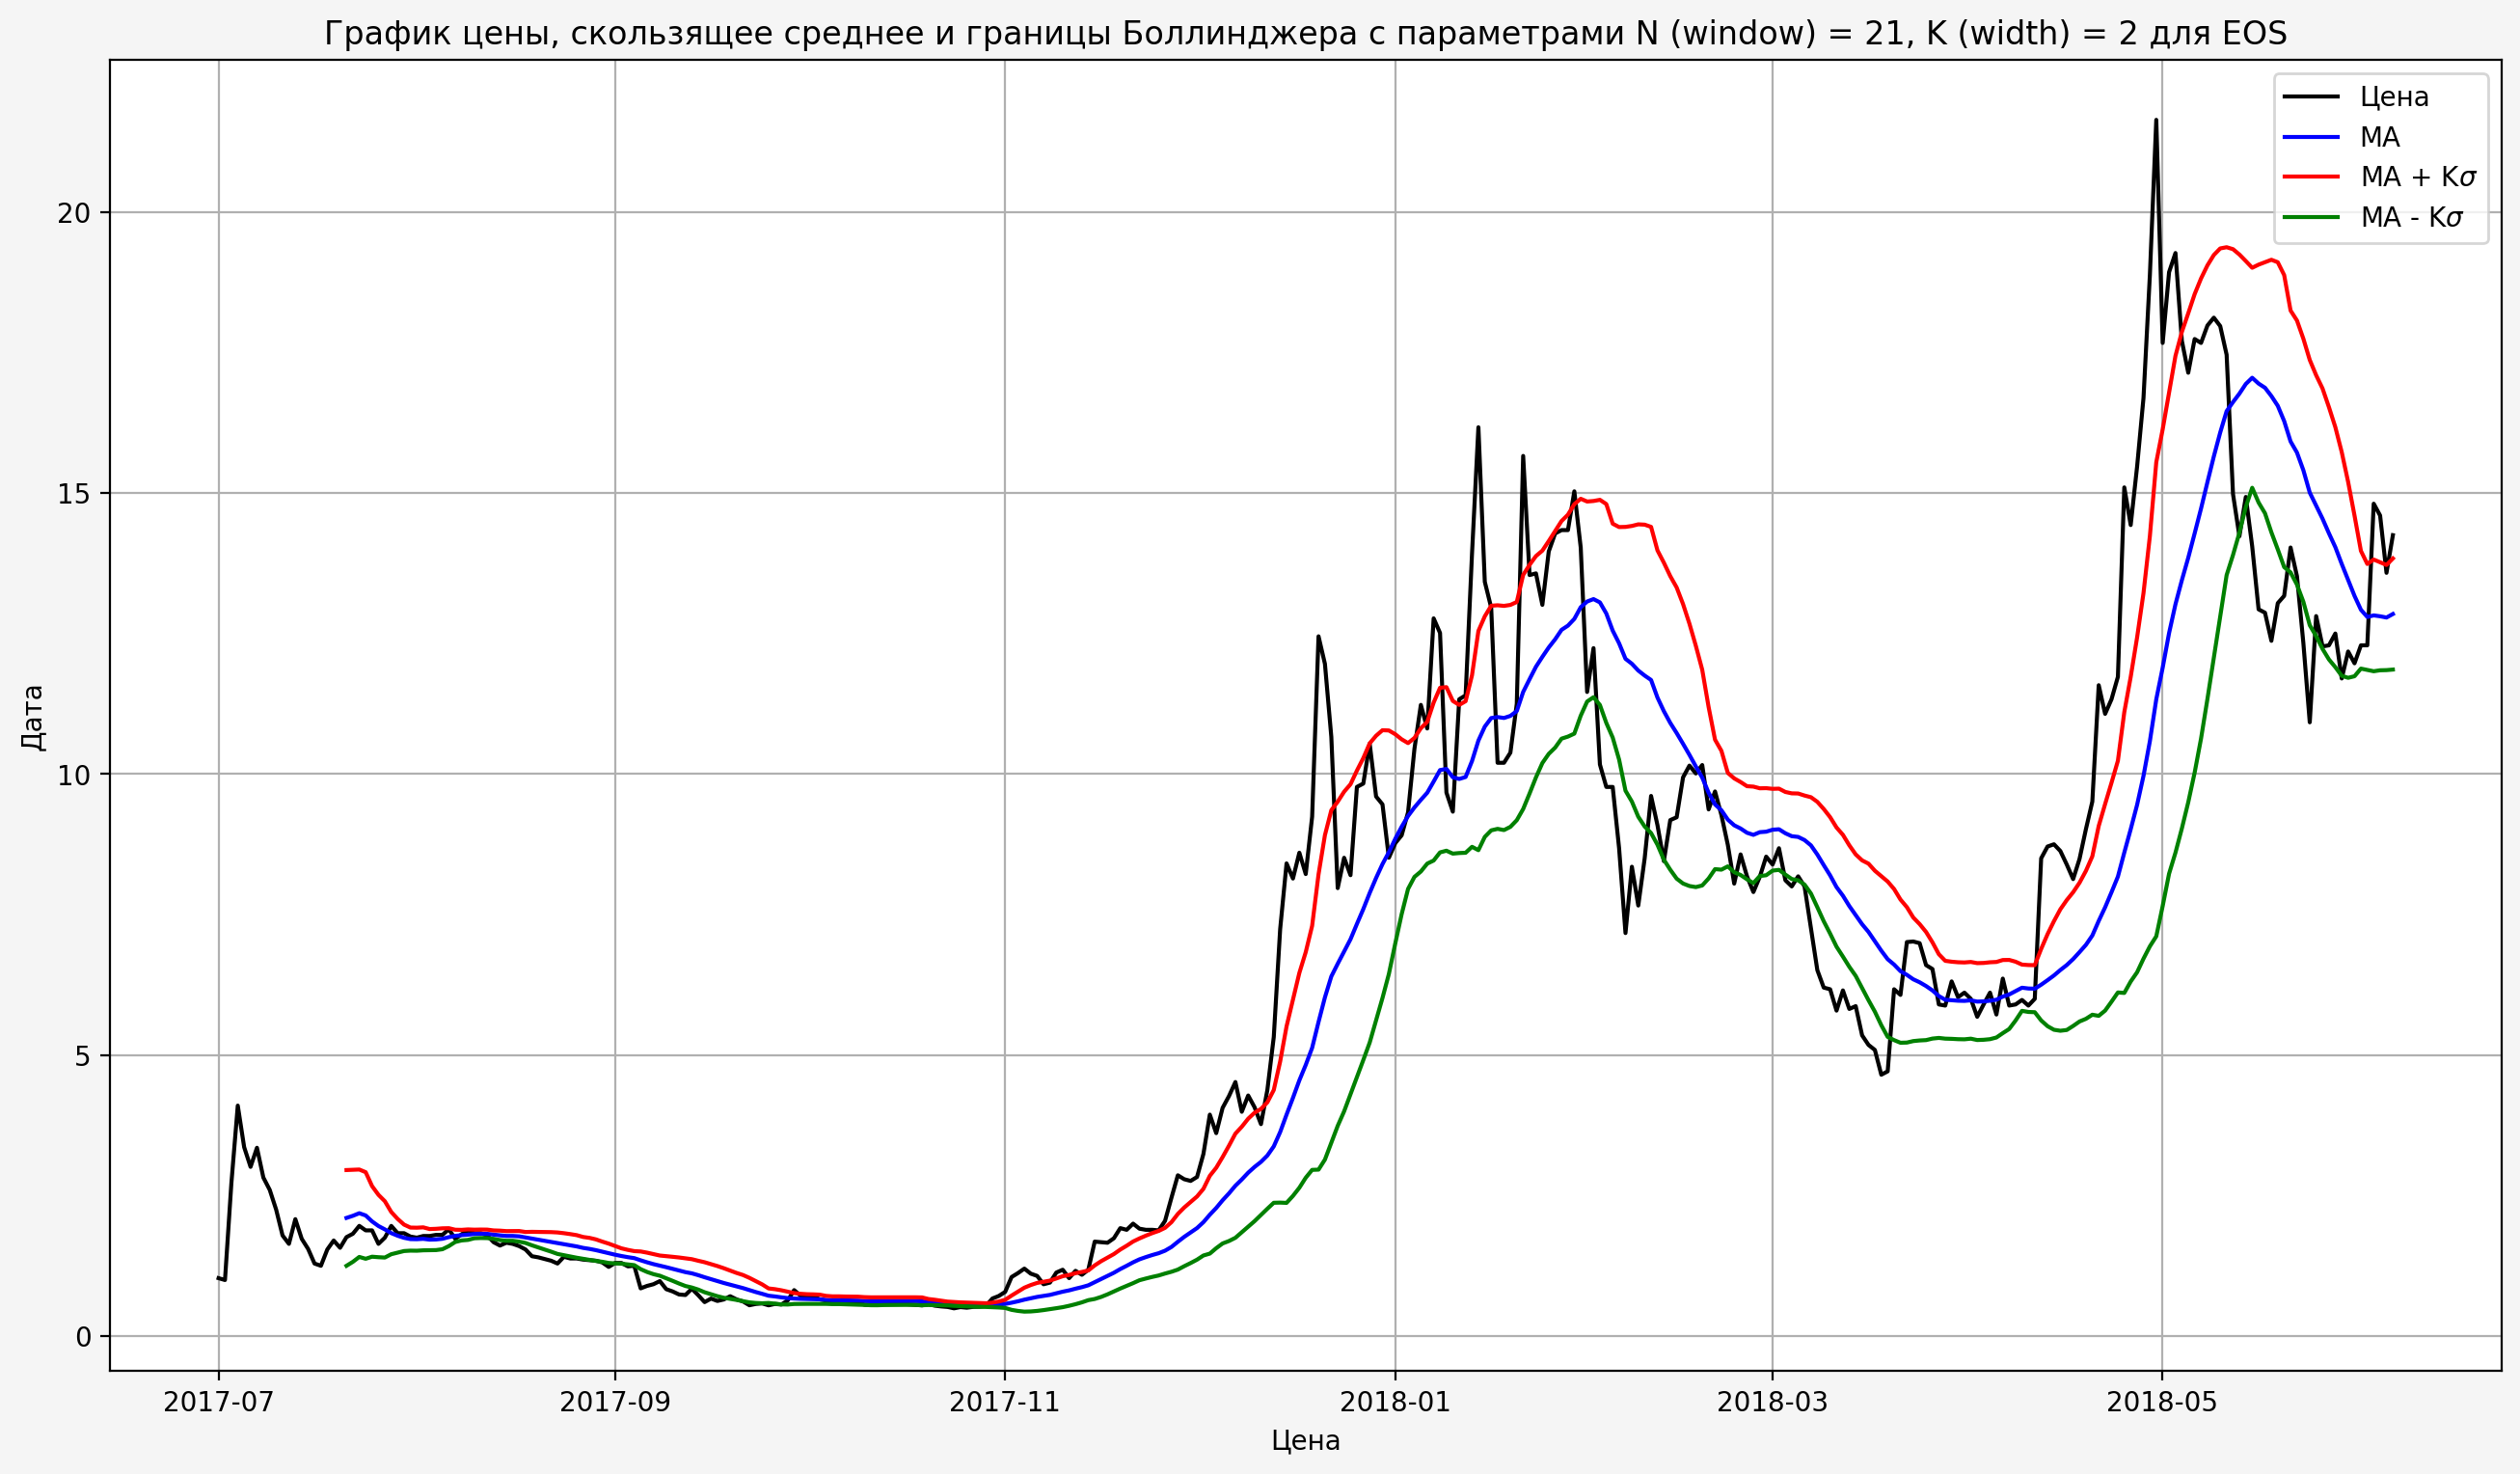

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Легко видеть что более 5% лежит вне зоны, что значит что правило не выполнилось
(веруны бы здесь потеряли деньги)

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [ ]:
def transform(x):
    if (x / 1 < 1):
        return (x % 1, 0.5, 0.6)
    elif (x / 1 >= 1) & (x / 1 < 2):
        return (0.3, x % 1, 0.4)
    else:
        return (0.1, 0.2, x % 1)

transform(1.5)

(0.3, 0.5, 0.4)

In [ ]:
def get_collors(symbols):
    if (len(symbols) <= 6):
        return ['red', 'orange', 'yellow', 'green', 'blue', 'violet'][:len(symbols)]
    else:
        ans = [0] * len(symbols)
        for i in range(1, len(symbols)):
            ans[i] = ans[i - 1] + 3 / len(symbols)
        for i in range(len(symbols)):
            ans[i] = transform(ans[i])
        return ans

get_collors(symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'))

['red', 'orange', 'yellow', 'green', 'blue']

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    data = coins[start_date:]
    sum  = 0
    colors = get_collors(symbols)

    fig = plt.figure(
        figsize=(16, 18),
        facecolor='whitesmoke',  # c подложкой цвета белый дым
        dpi=200 
    )

    common_capitalization_abs = fig.add_subplot(2, 1, 1)
    common_capitalization_rel = fig.add_subplot(2, 1, 2)

    chron_data = data.loc[data["symbol"] == symbols[0]]

    for i in range(len(symbols)):
        loc_data = data.loc[data["symbol"] == symbols[i]]
        sum += loc_data["market"]

        common_capitalization_abs.plot(
            pd.to_datetime(loc_data['date']), 
            loc_data['market'],
            color=colors[i],  
            linewidth=1,
            label=symbols[i]
        )

    for i in range(len(symbols)):
        loc_data = data.loc[data["symbol"] == symbols[i]]
        rel = loc_data["market"]
        rel = rel / sum * 100

        common_capitalization_rel.plot(
            pd.to_datetime(chron_data['date']), 
            rel,
            color=colors[i],  
            linewidth=1,
            label=symbols[i]
        )

    common_capitalization_rel.set_xlabel('Дата')
    common_capitalization_rel.set_ylabel('Относительная капитализация, %')
    common_capitalization_abs.set_xlabel('Дата')
    common_capitalization_abs.set_ylabel('Общая капиатлизация')
    common_capitalization_abs.legend(loc='best')
    common_capitalization_rel.legend(loc='best')


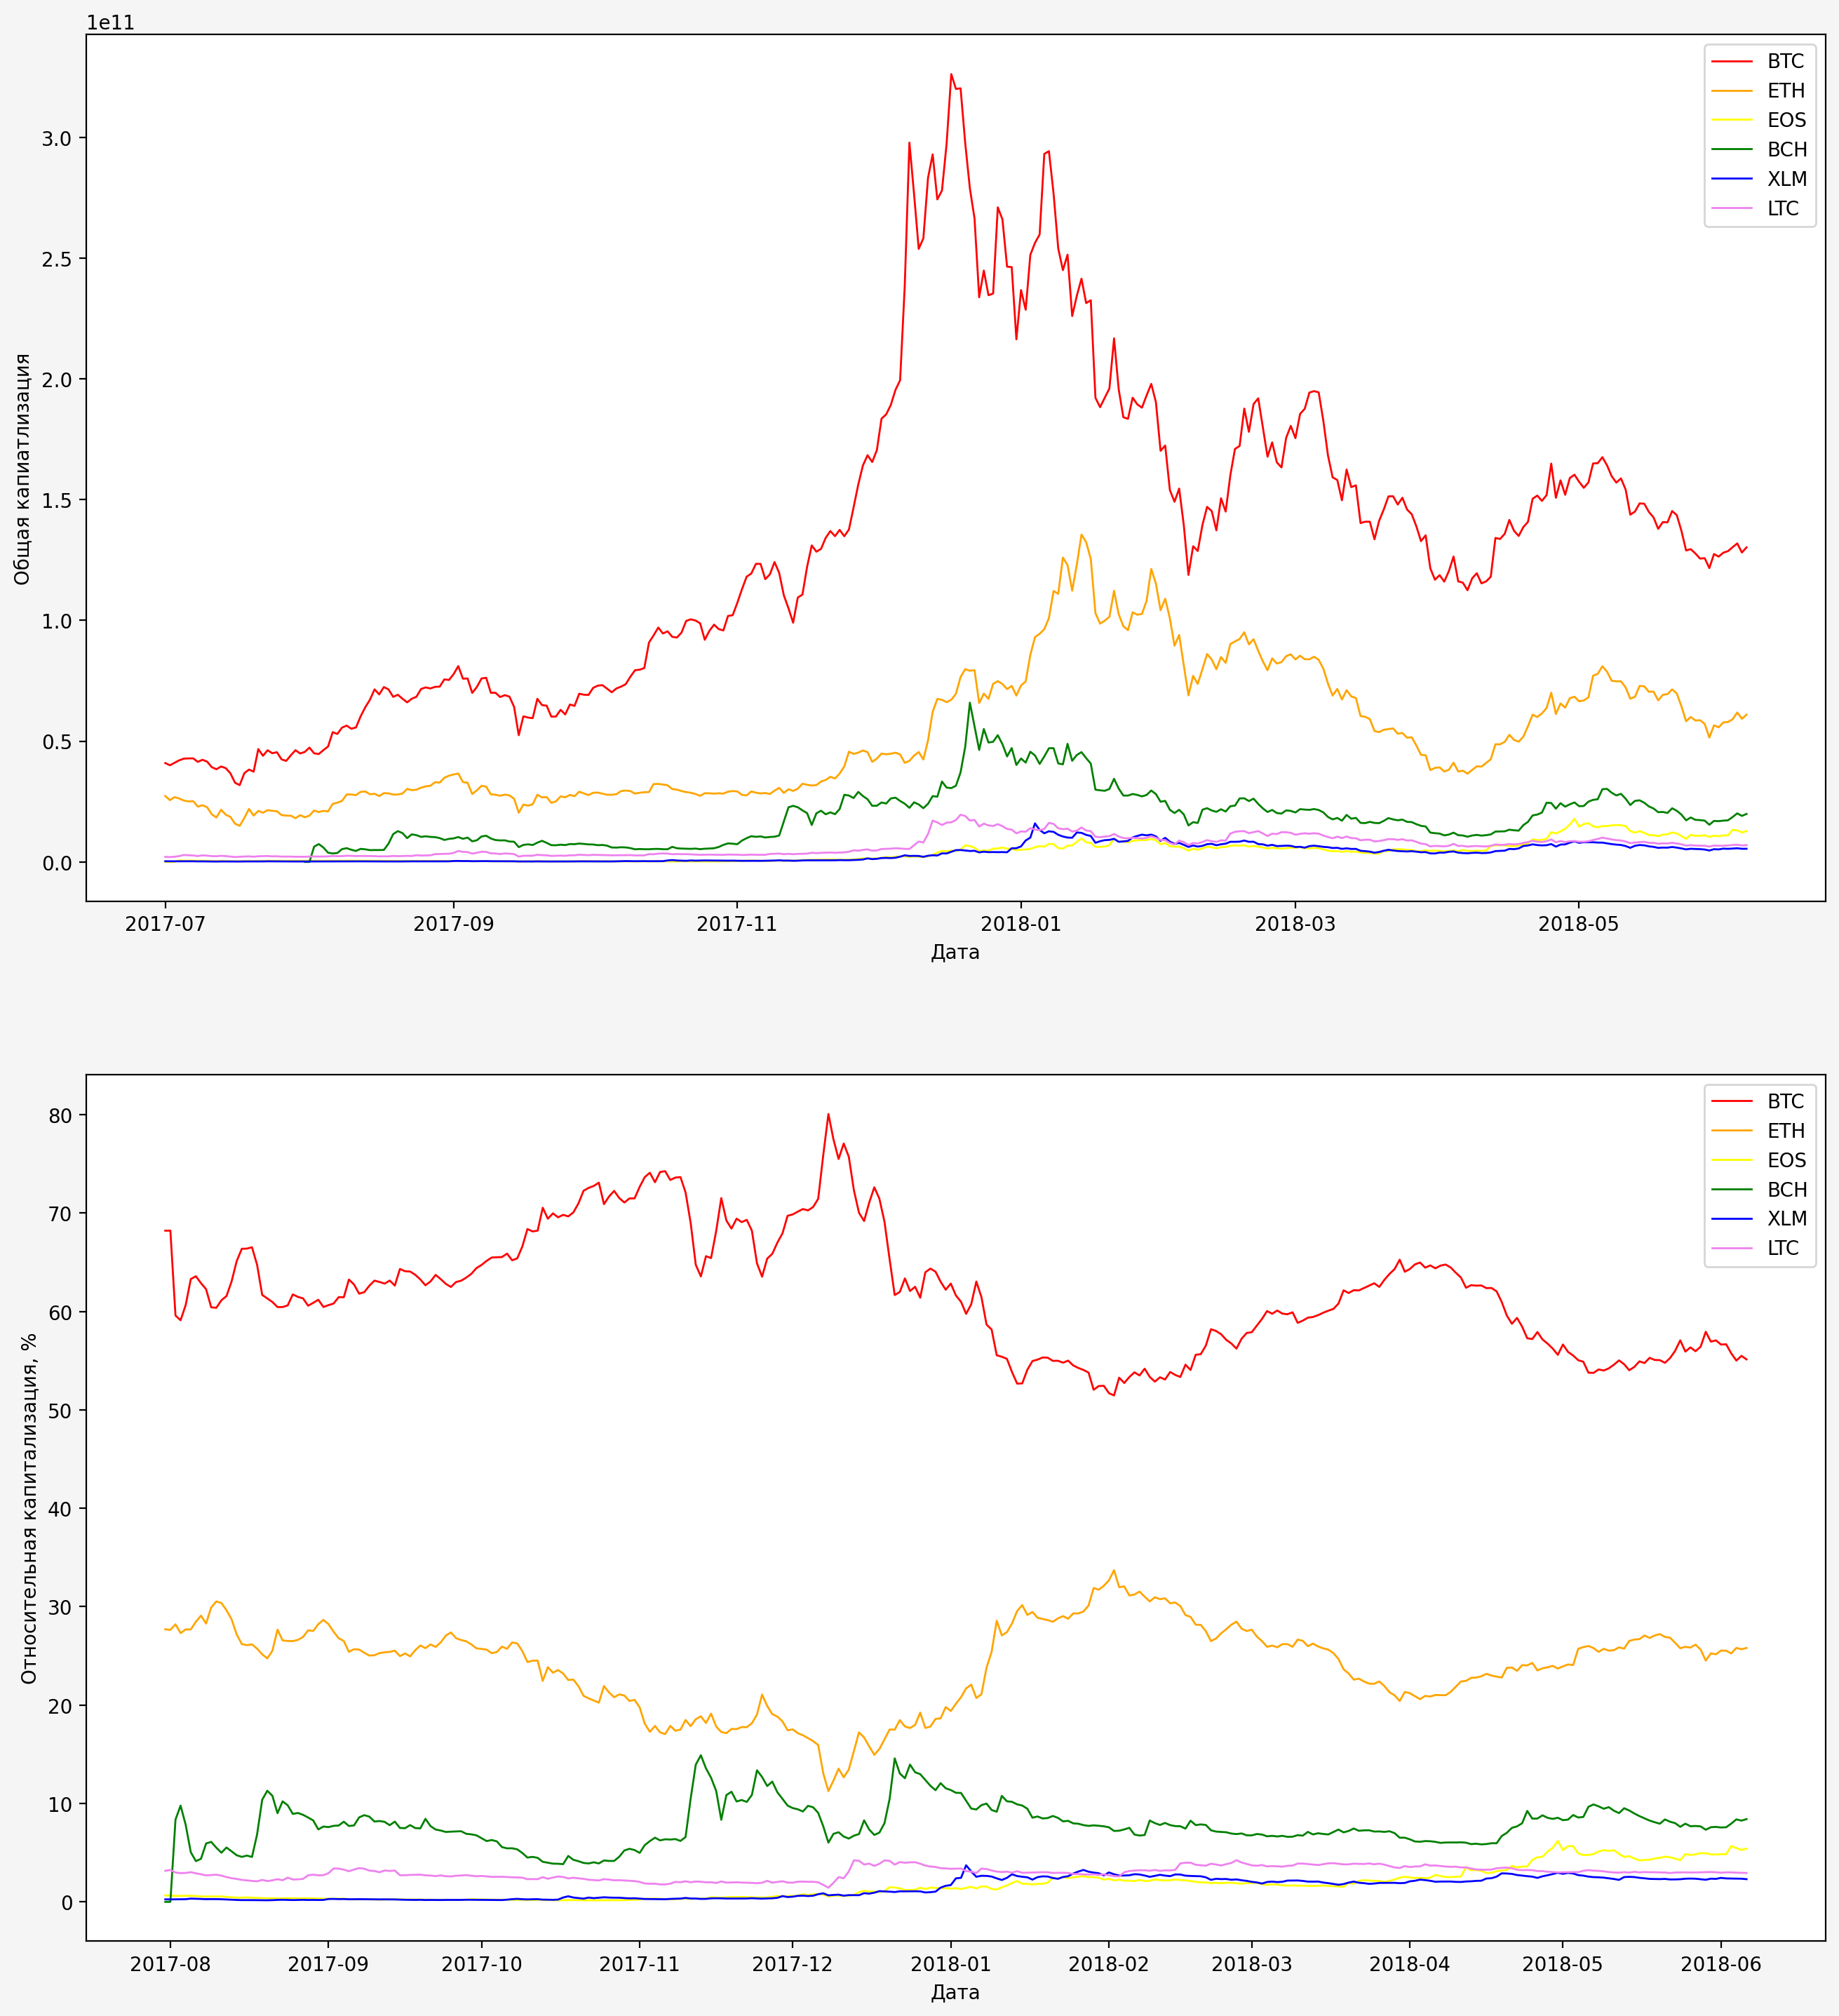

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Другие коины растут относительно, когда биткоин относительно падает, и обратно, потому что это уравнение y = 1 - x (y - альткоин, x - биткоин)

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    data_for_cor = coins[coins['date'] < date]
    ans = pd.DataFrame()
    for i in symbols:
        loc_data = data_for_cor[data_for_cor['symbol'] == i]
        ans[i] = loc_data['market'].rolling(window).mean()
    return ans.corr()

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.53,0.94,0.85,0.97,0.69
ETH,0.93,1.00,0.73,0.78,0.94,0.96,0.93
EOS,0.53,0.73,1.00,0.52,0.84,0.65,0.50
BCH,0.94,0.78,0.52,1.00,0.72,0.88,0.80
XLM,0.85,0.94,0.84,0.72,1.00,0.91,0.90
LTC,0.97,0.96,0.65,0.88,0.91,1.00,0.81
ADA,0.69,0.93,0.50,0.80,0.90,0.81,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.91,0.91,0.93,0.92,0.97,0.94
ETH,0.91,1.00,0.90,0.93,0.78,0.92,0.96
EOS,0.91,0.90,1.00,0.91,0.98,0.97,0.98
BCH,0.93,0.93,0.91,1.00,0.88,0.84,0.79
XLM,0.92,0.78,0.98,0.88,1.00,0.94,0.99
LTC,0.97,0.92,0.97,0.84,0.94,1.00,0.99
ADA,0.94,0.96,0.98,0.79,0.99,0.99,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

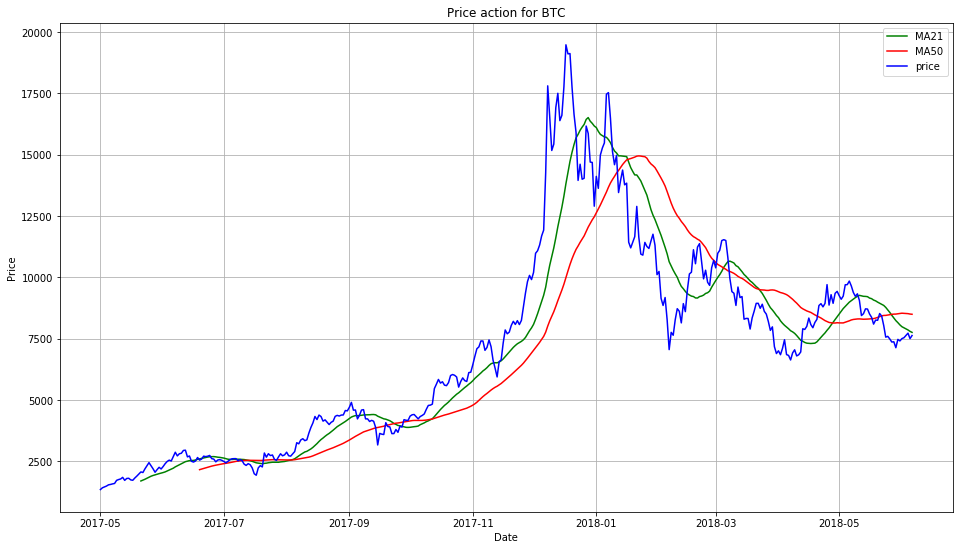

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    fig = plt.figure(figsize=(16, 9))
    
    ax1 = fig.add_subplot(222)
    ax2 = fig.add_subplot(221)
    
    coin = coins[coins['symbol'] == symbol]
    coin = coin[(coin['date'] >= str(start_date)) & (coin['date'] < str(end_date))]
    
    leading_mean = coin.close.rolling(lead_window).mean()
    lagging_mean = coin.close.rolling(lag_window).mean()
    
    price = coin['close']
    start_price = coin['close'].shift(1)

    count = [1 for i in range(len(leading_mean))]
    for i in range(len(leading_mean)):
        if (i != 0):
            count[i] = count[i - 1]
        if ((leading_mean[i] - lagging_mean[i]) > threshold * price[i]):
            count[i] = count[i] * price[i] / start_price[i]

    ax1.plot(price, color='blue', label='Price') 
    ax1.plot(leading_mean, color='green', label='Lead')
    ax1.plot(lagging_mean, color='red', label='Lag')  
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend(loc='best')
    ax1.set_title('Скользящее среднее по ценам')
    ax2.set_xlabel('Date')
    ax2.plot(count, color='red', label='Multiplication')  
    ax2.legend(loc='best')
    plt.show()

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy>

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

Низкая гибкость системы, в долгосрочной перспективе коэфициенты надо будет менять, при низком росте один , при сильном - другой, и на большой промежуток времени она проигрывает тупому удержанию позиции, при падении рынка уходит в минус, но данные данные недостачны для полного исследования, потому что не наблюдается достаточного продолжительного падения (в течении нескольких лет) при таком поведении оно будет проигрывать продаже на середине падения (наверно), нет других стратегий чтобы сравнивать, но при подборе определенных коэфициентов может заработать, однако данные коэфициенты неизвестны

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)